Chapter 20

# 鸡兔，MCMC
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码演示了贝叶斯更新过程中的后验分布变化，基于贝塔分布模型来估计两类事件（兔子和鸡）的比例。代码模拟了 200 次试验，每次记录出现“兔子”或“鸡”的结果。模型假设每次试验中“兔子”的出现概率为 \(\theta\)，并通过贝塔分布作为先验分布来估计该概率，使用 \( \text{Beta}(\alpha, \alpha) \)，其中 \(\alpha = 1\) 表示初始先验的“中立”信念。

1. **数据生成与初步可视化**：
   - `Data_all_trials` 是基于真实比例（设定为 45%）生成的 200 次二项分布随机数据（兔子为1，鸡为0）。接着，代码将这些结果绘制为散点图，展示每次试验的结果（兔子或鸡），并计算每次试验后兔子的累计比例 \(\hat{\theta}_{\text{兔子}}\) 和鸡的累计比例 \(\hat{\theta}_{\text{鸡}}\) 随试验次数的变化情况。

2. **贝叶斯后验分布更新**：
   - 为了展示随着试验次数增加，后验分布如何不断更新，代码从试验中随机采样并计算每个采样后的后验分布。假设观察到 \(s\) 次兔子和 \(n-s\) 次鸡，则后验分布的形式为 \(\text{Beta}(s + \alpha, n - s + \alpha)\)。这里通过逐步累积试验数据来更新后验分布。

3. **后验分布的可视化**：
   - 使用填充曲线图以“山脊线”样式绘制了后验分布随试验次数增加的动态变化，每条曲线代表一次更新后的后验分布。
   - 代码还选取了不同的试验次数（例如，0、1、2、3、4、5、10、100、200），对每个次数的后验分布进行独立绘制，展示后验分布的形状如何随数据增加逐渐收敛到真实比例。每个子图上用红线表示后验分布的最大后验概率位置（MAP），黑色虚线表示真实比例。

## 导入必要的库

In [1]:
import numpy as np  # 导入NumPy用于数值计算
from matplotlib import pyplot as plt  # 导入pyplot用于绘图
import scipy.stats as stats  # 导入SciPy的stats模块用于统计计算

beta_dist = stats.beta  # 使用Beta分布作为后验分布

alpha = 1  # 设置先验参数alpha，表示置信度
true_percentage = 0.45  # 设置兔子的真实概率为0.45
Data_all_trials = stats.bernoulli.rvs(true_percentage, size=200)  # 生成200次伯努利试验数据，兔子概率为0.45

## 可视化试验数据

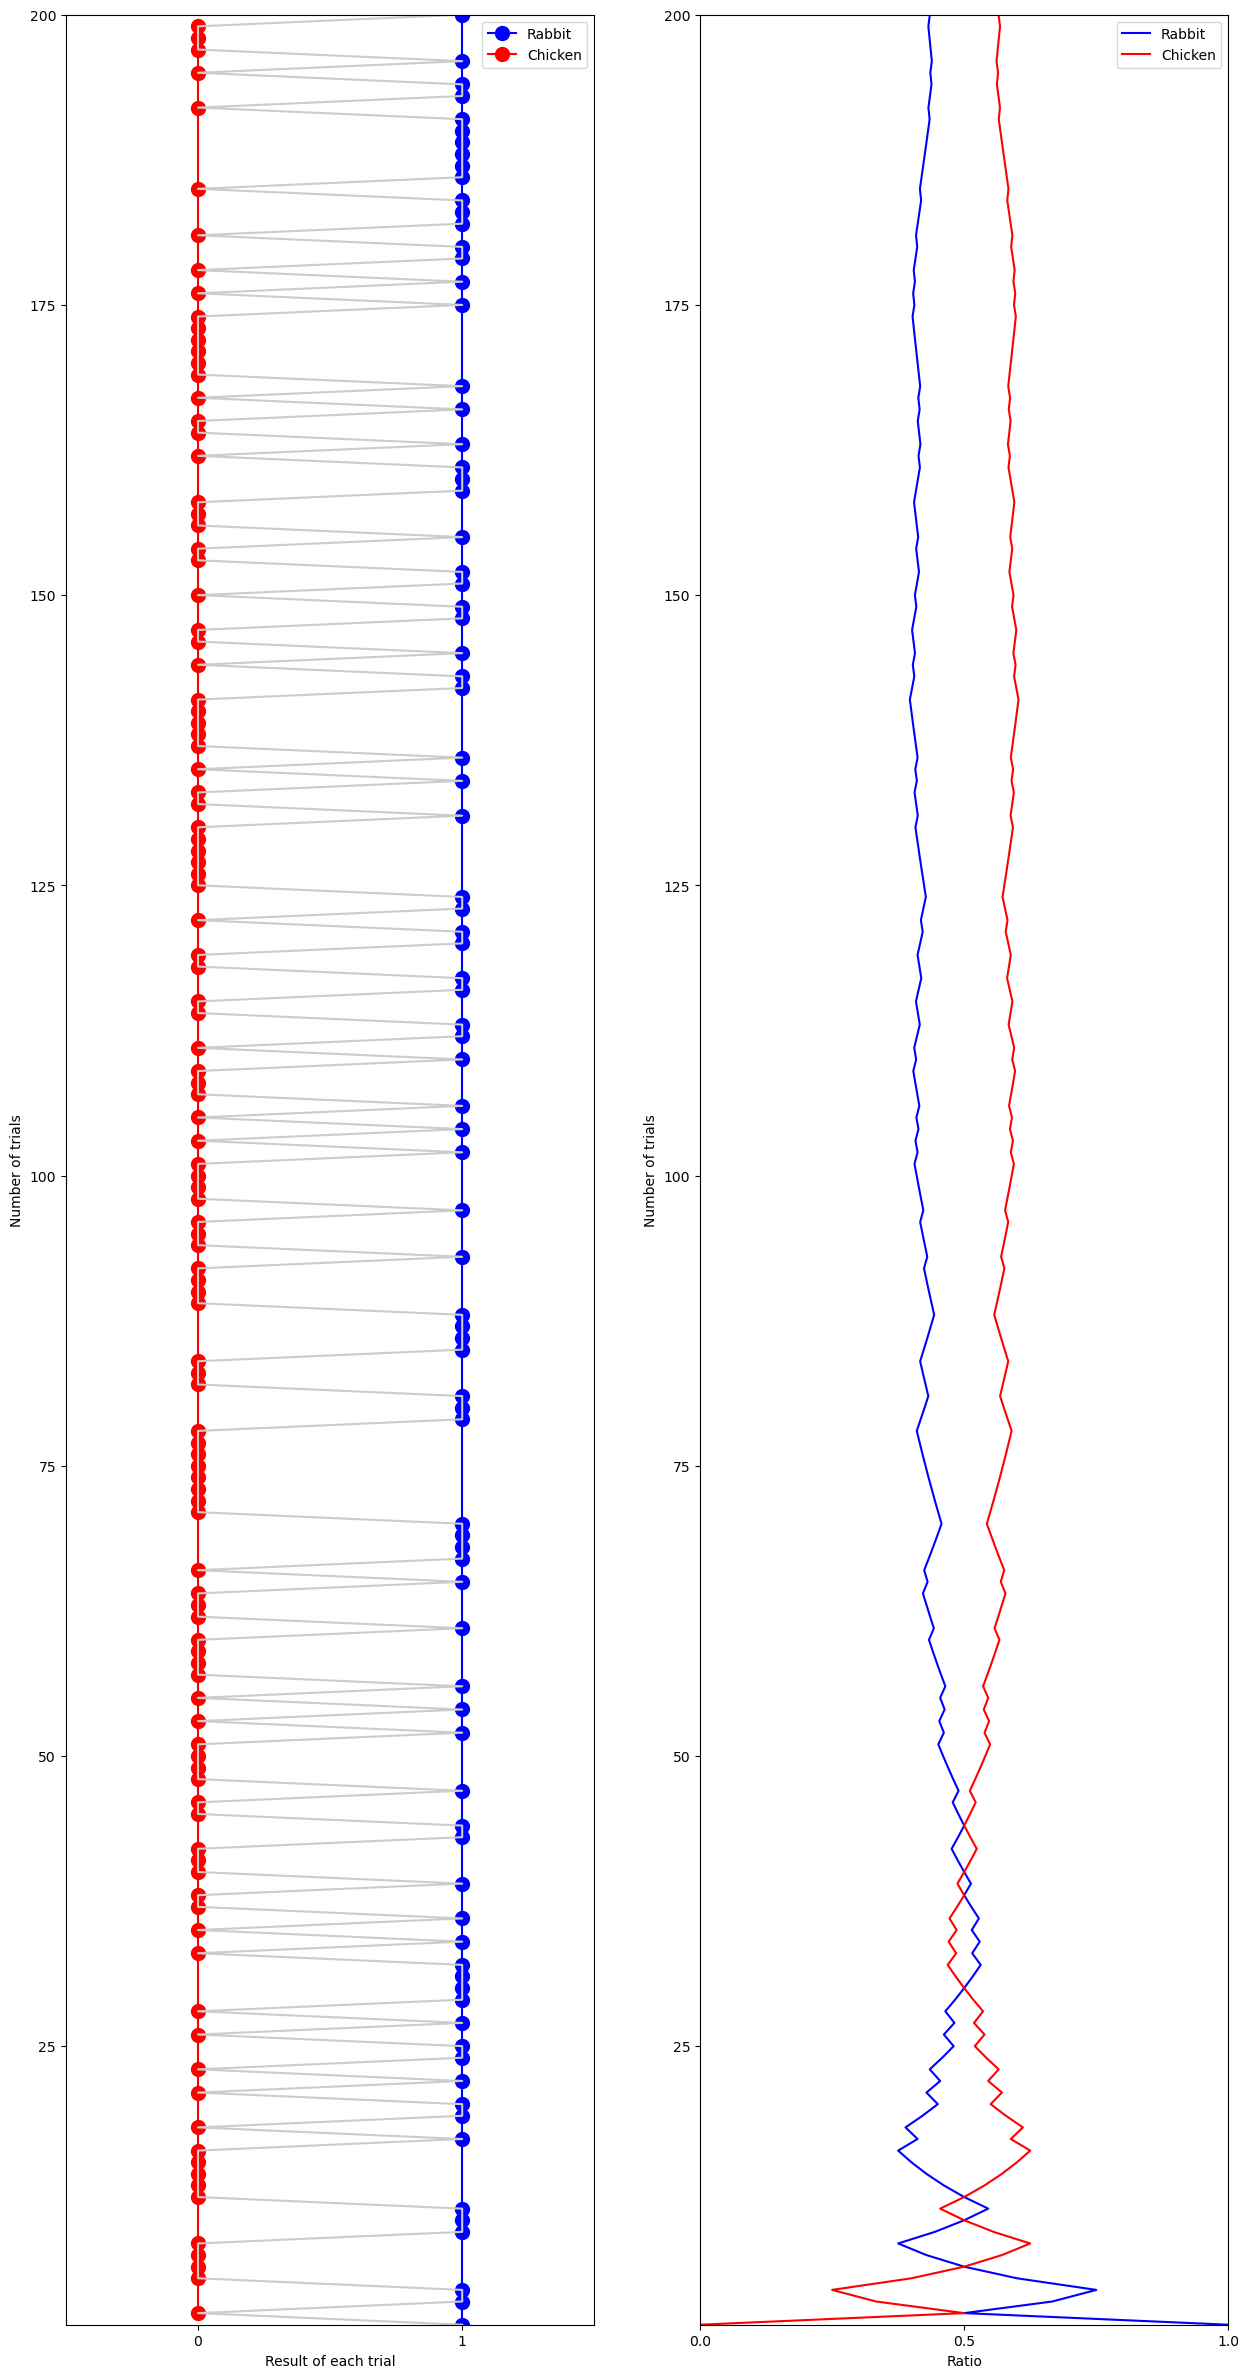

In [2]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 30))  # 创建一个包含两个子图的绘图窗口

trials_array = np.arange(0, 200) + 1  # 生成1到200的试验次数数组
mask = (Data_all_trials == 1)  # 定义布尔掩码，筛选出兔子试验结果

# 绘制兔子的散点图，蓝色点表示
axs[0].plot(Data_all_trials[mask], trials_array[mask], color='b', marker='.', markersize=20, label='Rabbit')

# 绘制鸡的散点图，红色点表示
axs[0].plot(Data_all_trials[~mask], trials_array[~mask], color='r', marker='.', markersize=20, label='Chicken')

# 绘制所有试验数据的灰色背景曲线
axs[0].plot(Data_all_trials, trials_array, color=[0.8, 0.8, 0.8])

# 设置第一个子图的y轴范围和x轴范围
axs[0].set_ylim(1, 200)
axs[0].set_xlim(-0.5, 1.5)

# 设置x轴刻度
axs[0].set_xticks([0, 1])

# 设置y轴标签
axs[0].set_ylabel("Number of trials", rotation=90)

# 设置x轴标签
axs[0].set_xlabel("Result of each trial")

# 添加图例
axs[0].legend()

# 计算兔子出现的累计比例
ratio_rabbits = np.cumsum(Data_all_trials) / trials_array
# 计算鸡的累计比例
ratio_chickens = 1 - ratio_rabbits

# 绘制兔子的比例曲线，蓝色线表示
axs[1].plot(ratio_rabbits, trials_array, color='b', label='Rabbit')

# 绘制鸡的比例曲线，红色线表示
axs[1].plot(ratio_chickens, trials_array, color='r', label='Chicken')

# 设置第二个子图的y轴范围和x轴范围
axs[1].set_ylim(1, 200)
axs[1].set_xlim(0, 1)

# 设置x轴刻度
axs[1].set_xticks([0, 0.5, 1])

# 设置y轴标签
axs[1].set_ylabel("Number of trials", rotation=90)

# 设置x轴标签
axs[1].set_xlabel("Ratio")

# 添加图例
axs[1].legend()

## 后验分布的连续变化

Text(0, 0.5, 'Number of trials')

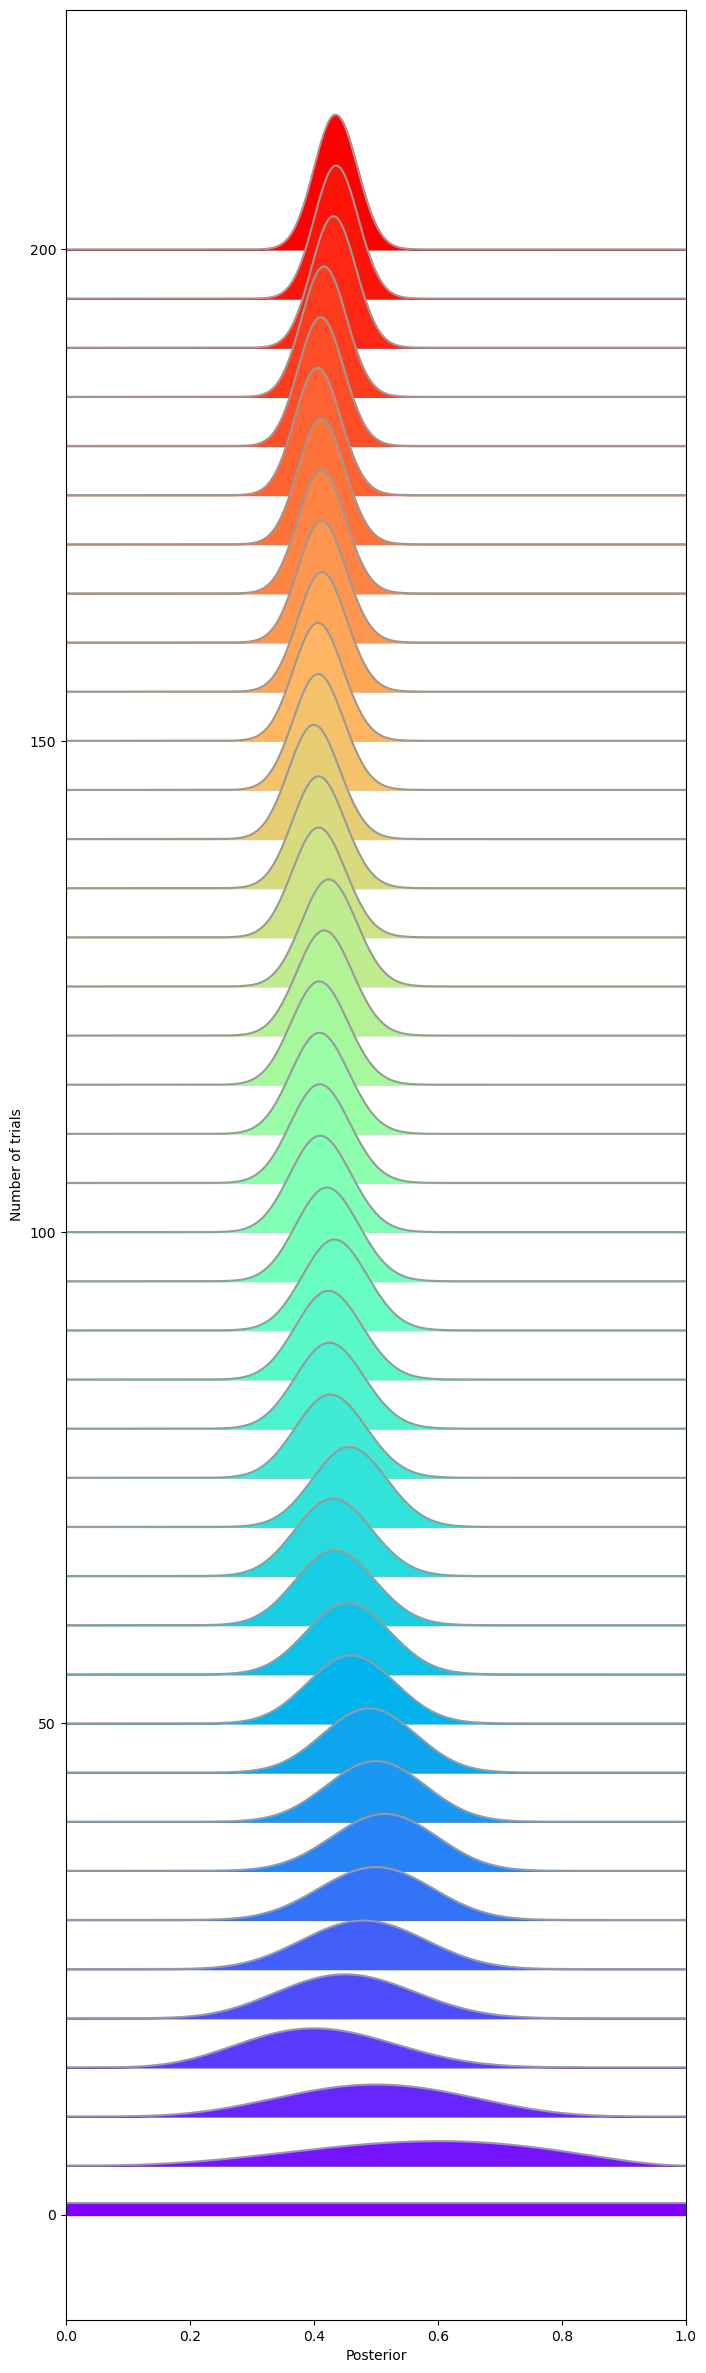

In [3]:
from matplotlib.pyplot import cm  # 导入cm模块用于生成颜色渐变

theta_array = np.linspace(0, 1, 500)  # 生成0到1的500个θ值

num_animals_array = np.arange(0, 200 + 5, 5)  # 生成试验次数数组，步长为5
num_animals_array = num_animals_array[::-1]  # 将数组逆序排列

colors = cm.rainbow_r(np.linspace(0, 1, len(num_animals_array)))  # 生成颜色渐变

fig, ax = plt.subplots(figsize=(8, 30))  # 创建一个单个子图的图形窗口

# 遍历试验次数，计算并绘制每次的后验分布曲线
for idx, num_animals_idx in enumerate(num_animals_array):
    height = num_animals_idx  # 设置高度
    data_idx = Data_all_trials[0:num_animals_idx]  # 获取当前试验次数的数据

    num_rabbits_idx = data_idx.sum()  # 计算兔子的数量
    posterior_pdf = beta_dist.pdf(theta_array, num_rabbits_idx + alpha, num_animals_idx - num_rabbits_idx + alpha)  # 计算后验PDF

    ratio = 1.2  # 设置比例系数
    ax.plot(theta_array, posterior_pdf * ratio + height, color=[0.6, 0.6, 0.6])  # 绘制后验分布曲线
    ax.fill_between(theta_array, height, posterior_pdf * ratio + height, color=colors[idx])  # 填充曲线下方区域

# 设置x轴范围
ax.set_xlim(0, 1)

# 设置x轴标签
ax.set_xlabel('Posterior')

# 设置y轴标签
ax.set_ylabel('Number of trials')

## 后验分布曲线快照

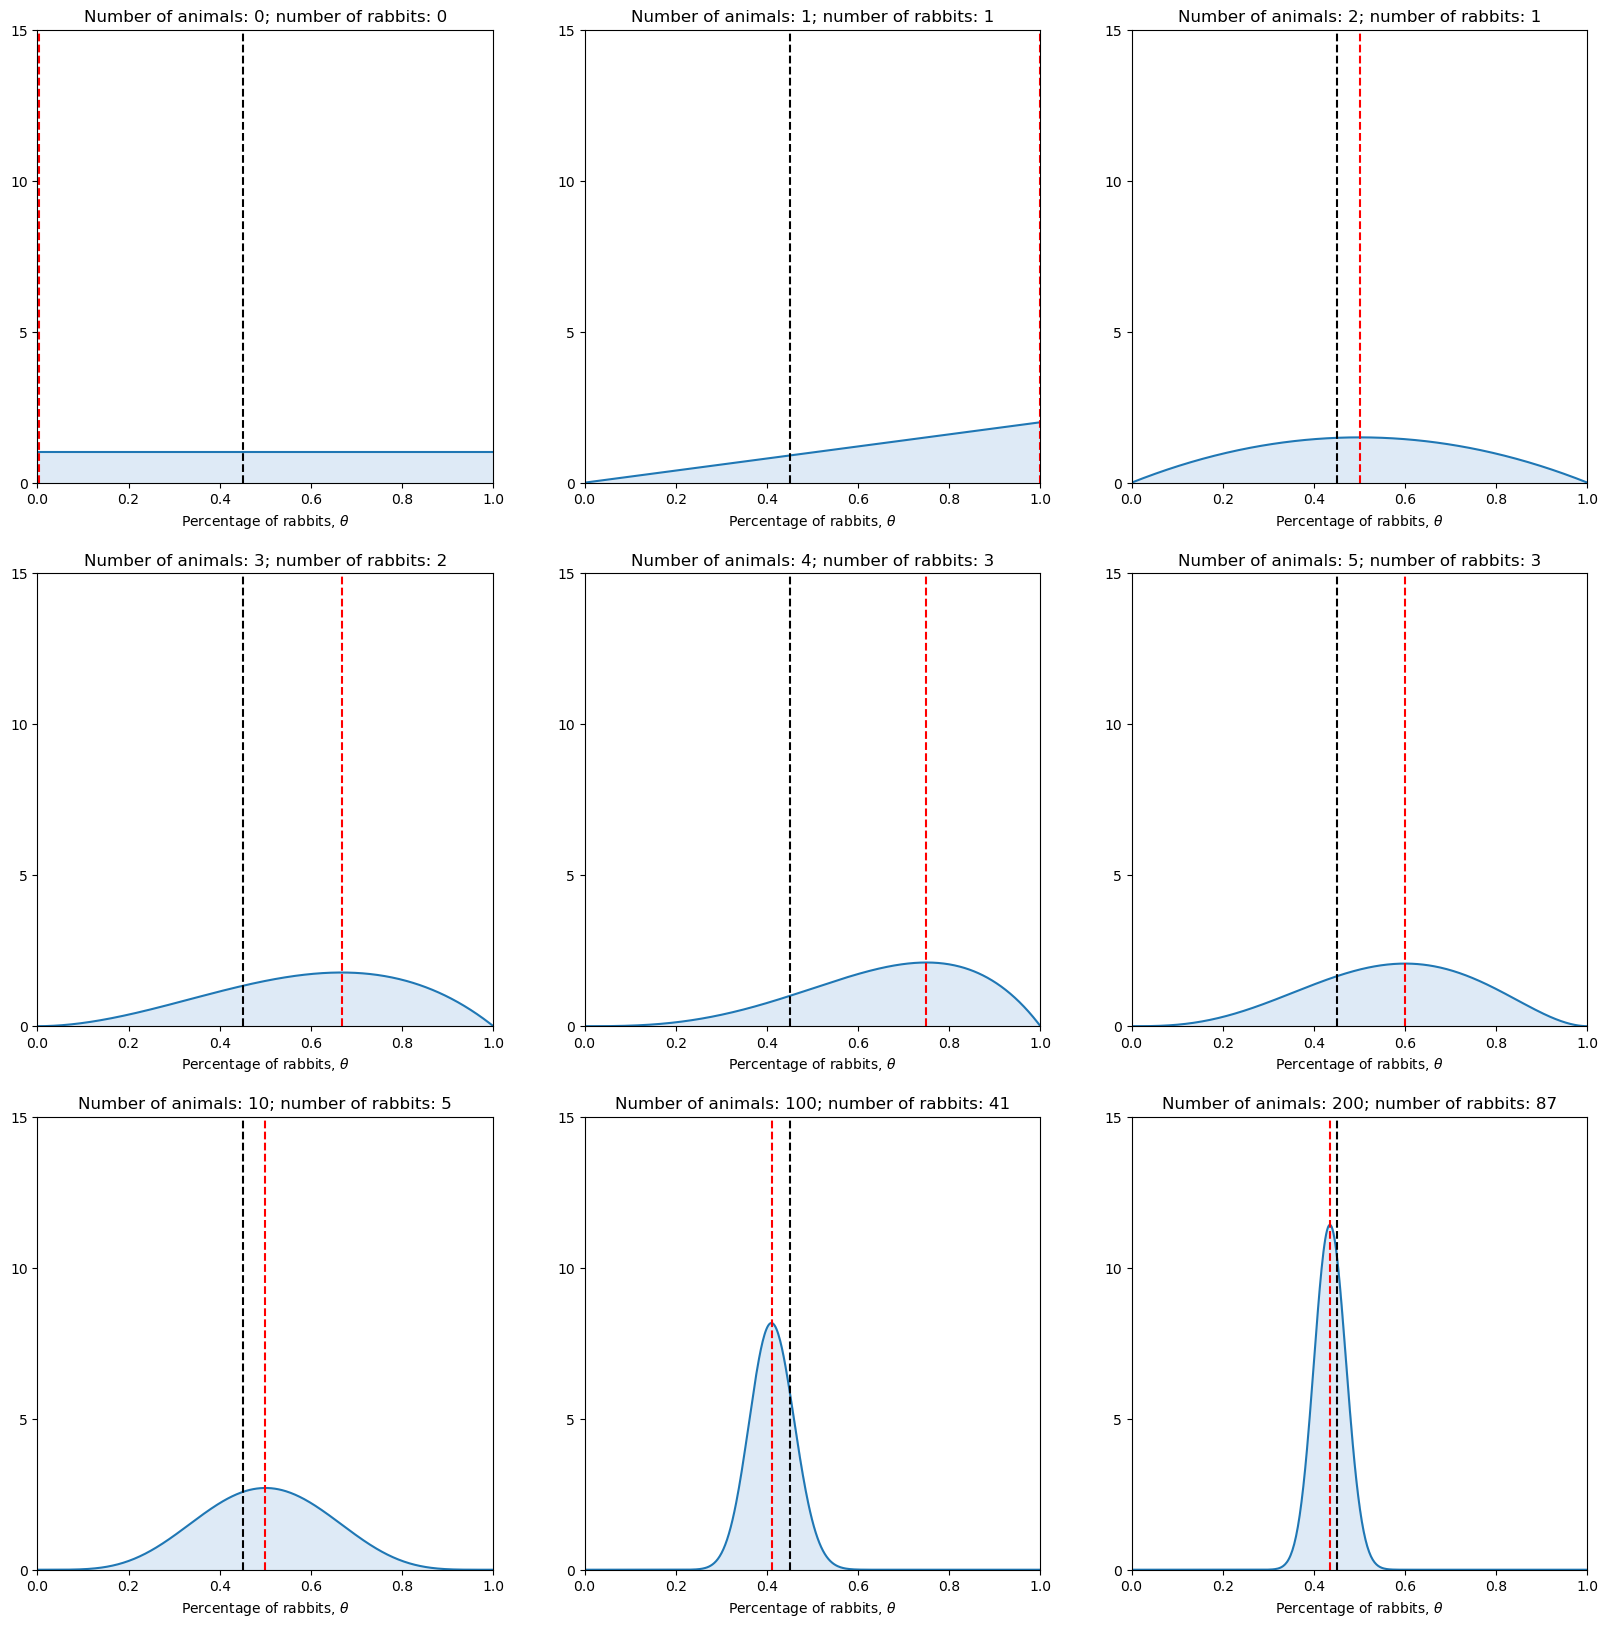

In [4]:
num_animals_array = [0, 1, 2, 3, 4, 5, 10, 100, 200]  # 定义不同试验次数的快照

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))  # 创建包含3x3子图的图形窗口

# 遍历不同试验次数，绘制每次的后验分布快照
for ax_idx, num_animals_idx in zip(axs.ravel(), num_animals_array):
    data_idx = Data_all_trials[0:num_animals_idx]  # 获取当前试验次数的数据
    num_rabbits_idx = data_idx.sum()  # 计算兔子的数量
    posterior_pdf = beta_dist.pdf(theta_array, num_rabbits_idx + alpha, num_animals_idx - num_rabbits_idx + alpha)  # 计算后验PDF

    loc_max = theta_array[np.argmax(posterior_pdf)]  # 获取后验分布的最大值位置

    # 绘制当前试验次数的后验分布曲线
    ax_idx.plot(theta_array, posterior_pdf)
    ax_idx.axvline(x=loc_max, color='r', linestyle='--')  # 绘制最大位置的红色虚线
    ax_idx.set_title("Number of animals: %d; number of rabbits: %d" % (num_animals_idx, num_rabbits_idx))  # 设置子图标题

    # 设置x轴标签
    ax_idx.set_xlabel('Percentage of rabbits, $\\theta$')

    # 填充曲线下方区域
    ax_idx.fill_between(theta_array, 0, posterior_pdf, color="#DEEAF6")

    # 绘制真实比例的黑色虚线
    ax_idx.axvline(x=true_percentage, color='k', linestyle='--')
    
    # 设置x轴范围和y轴刻度
    ax_idx.set_xlim(0, 1)
    ax_idx.set_yticks([0, 5, 10, 15])
    ax_idx.set_ylim(0, 15)